In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [173]:
def ogs(x):

    xaim = 1000

    rflare = 16500
    
    hcloop = 1700
    
    hdecay = 29
    
    gsstp = np.deg2rad(24)
    gssh = np.deg2rad(2.5)
    
    tgstp = np.tan(gsstp)
    tgsh = np.tan(gssh)
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)
    
    xa = xk - rflare*np.sin(gsstp) + hcloop/tgstp

    return max(0.0, (xa - x) * tgstp)

def flare(x):

    xaim = 1000

    rflare = 16500
    
    hcloop = 1700
    
    hdecay = 29
    
    gsstp = np.deg2rad(24)
    gssh = np.deg2rad(2.5)
    
    tgstp = np.tan(gsstp)
    tgsh = np.tan(gssh)
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)
    
    xa = xk - rflare*np.sin(gsstp) + hcloop/tgstp
    
    xflarecir = xk - x
    yflarecir = np.sqrt(rflare**2 - xflarecir**2)

    return hk - yflarecir

def flareexp(x):

    xaim = 1000

    rflare = 16500
    
    hcloop = 1700
    
    hdecay = 29
    
    gsstp = np.deg2rad(24)
    gssh = np.deg2rad(2.5)
    
    tgstp = np.tan(gsstp)
    tgsh = np.tan(gssh)
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)

    sigma_exp = 750

    herrexp = hdecay * math.exp((xexp - x)/sigma_exp)
    
    href = igs(x)
    href += min(href, herrexp)
    return max(0.0, href)

def igs(x):

    tgsh = 0.04366094291
    xaim = 1000

    return max(0.0, (xaim - x) * tgsh)

def igs2(x):

    tgsh = 0.04366094291
    xaim = 1000
    hdecay = 29

    return max(0.0, (xaim - x) * tgsh + hdecay)
    
def flarehdot(x):
    
    xaim = 1000

    rflare = 16500
    
    hcloop = 1700
    
    hdecay = 29
    
    gsstp = np.deg2rad(24)
    gssh = np.deg2rad(2.5)
    
    tgstp = np.tan(gsstp)
    tgsh = np.tan(gssh)
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    xk = xexp + rflare*np.sin(gssh)
    
    xflarecir = xk - x
    yflarecir = np.sqrt(rflare**2 - xflarecir**2)
    
    return -np.rad2deg(np.arctan(xflarecir/yflarecir))

def exphdot(x):
    
    xaim = 1000

    rflare = 16500
    
    hcloop = 1700
    
    hdecay = 29
    
    sigma_exp = 750
    
    gsstp = np.deg2rad(24)
    gssh = np.deg2rad(2.5)
    
    tgstp = np.tan(gsstp)
    tgsh = np.tan(gssh)
    
    hk = hcloop + rflare*np.cos(gsstp)
    
    he = hk - rflare*np.cos(gssh) - hdecay
    
    xexp = -he/tgsh + xaim
    
    herrexp = hdecay * math.exp((xexp - x)/sigma_exp)
    
    return -np.rad2deg(np.arctan( tgsh + herrexp/sigma_exp ))
    

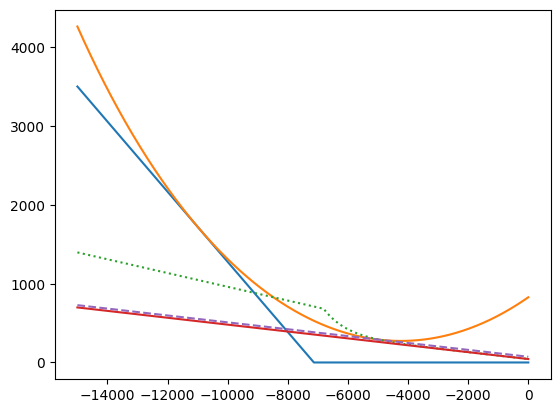

In [174]:
x = np.linspace(-15000, 0, 1000)

plt.figure()

plt.plot(x, [ogs(x_) for x_ in x])
plt.plot(x, [flare(x_) for x_ in x])
plt.plot(x, [flareexp(x_) for x_ in x], ':')
plt.plot(x, [igs(x_) for x_ in x])
plt.plot(x, [igs2(x_) for x_ in x], '--')



(0.0, 400.0)

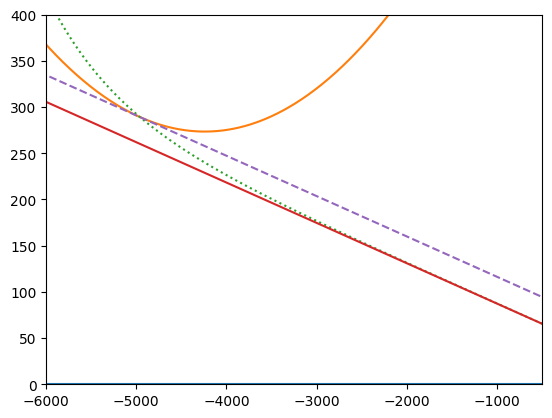

In [167]:
plt.figure()

plt.plot(x, [ogs(x_) for x_ in x])
plt.plot(x, [flare(x_) for x_ in x])
plt.plot(x, [flareexp(x_) for x_ in x], ':')
plt.plot(x, [igs(x_) for x_ in x])
plt.plot(x, [igs2(x_) for x_ in x], '--')

plt.xlim([-6000, -500])
plt.ylim([0, 400])

-10951.095177025803 -4959.660457803143
-2.500000000000001 -4.706410624598076


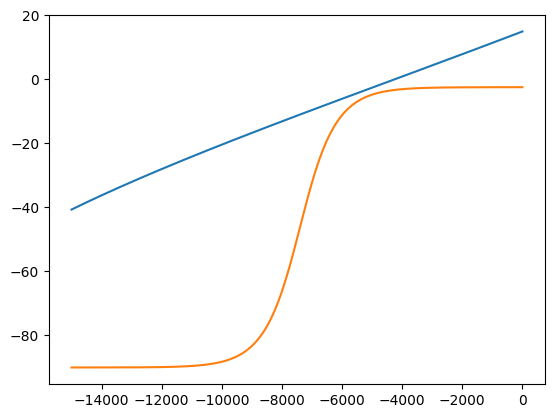

In [176]:
print(-10951.095177025803, -4959.660457803143)

print(flarehdot(-4959.660457803143), exphdot(-4959.660457803143))


plt.figure()

plt.plot(x, [flarehdot(x_) for x_ in x])
plt.plot(x, [exphdot(x_) for x_ in x])